In [14]:
import pandas as pd
import imt
import matplotlib.pyplot as plt
import numpy as np
import tree
from imt.utils.view import view

import mujoco
import mujoco_viewer
import qmt
import ring
from ring.rendering.mujoco_render import MujocoScene


In [2]:
# this data was sampled at 60 Hz
Ts = 1/60

acc1 = pd.read_csv("data/knee_tracking1/femur.csv", sep=",", skiprows=11)[["Acc_X", "Acc_Y", "Acc_Z"]].to_numpy()
gyr1 = pd.read_csv("data/knee_tracking1/femur.csv", sep=",", skiprows=11)[["Gyr_X", "Gyr_Y", "Gyr_Z"]].to_numpy()
mag1 = pd.read_csv("data/knee_tracking1/femur.csv", sep=",", skiprows=11)[["Mag_X", "Mag_Y", "Mag_Z"]].to_numpy()
acc2 = pd.read_csv("data/knee_tracking1/tibia.csv", sep=",", skiprows=11)[["Acc_X", "Acc_Y", "Acc_Z"]].to_numpy()
gyr2 = pd.read_csv("data/knee_tracking1/tibia.csv", sep=",", skiprows=11)[["Gyr_X", "Gyr_Y", "Gyr_Z"]].to_numpy()
mag2 = pd.read_csv("data/knee_tracking1/tibia.csv", sep=",", skiprows=11)[["Mag_X", "Mag_Y", "Mag_Z"]].to_numpy()

acc1, gyr1, mag1, acc2, gyr2, mag2 = imt.utils.crop_tail((acc1, gyr1, mag1, acc2, gyr2, mag2), 1 / Ts)
gyr1, gyr2 = np.deg2rad(gyr1), np.deg2rad(gyr2)

`crop_tail`: Crop off at t=54.36666666666667s


In [3]:
solver = imt.Solver([-1, 0], 
                    methods=[imt.methods.VQF(offline=True), 
                     imt.wrappers.JointTracker1D(imt.wrappers.LPF(imt.wrappers.JointPosition(imt.wrappers.FractualStepping(imt.methods.RNNO(), 100), dof_is_1d=True), quat_f_cutoff=2))], 
                     Ts=Ts)
qhat, extras = solver.step({
    0: dict(acc=acc1, gyr=gyr1), 1: dict(acc=acc2, gyr=gyr2)
})

In [4]:
solver.print_graph()

-1 (Earth)
|
0
└── 1


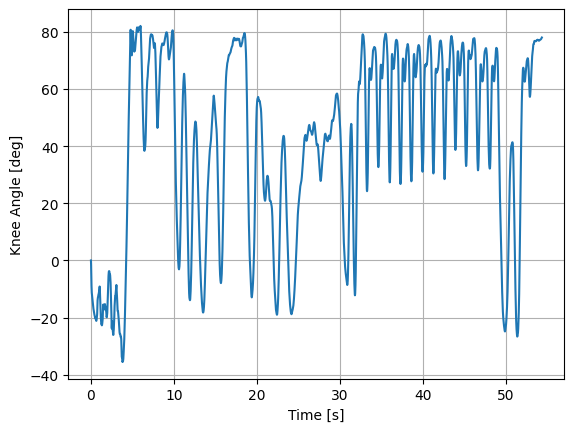

In [5]:
T = qhat[0].shape[0]
ts = np.arange(T)*Ts
plt.plot(ts, np.rad2deg(extras[1]["joint_angle_rad"]))
plt.grid()
plt.ylabel("Knee Angle [deg]")
plt.xlabel("Time [s]")
plt.show()

In [15]:
# show only the first 10 seconds
T = int(10 / Ts)
pos = np.zeros((T, 3))
pos[:, 2] = 0.5

qhat_first_10_seconds = tree.map_structure(lambda a: a[:T], qhat)
view([-1, 0], qhat_first_10_seconds, extras, 1 / Ts, global_translation=pos, mode="offscreen", #show_floor=True, 
     width=640, height=480, offscreen_mode_options=dict(camid=1, github=True), show_every_nth_frame=3)

To save the video permanently, provide the path to where the .mp4 is  saved by specifying `offscreen_mode_options=dict(output_path=...)`


TypeError: MujocoScene.__init__() got an unexpected keyword argument 'floor_material'